### Sistema de Recomendación
Calcular el valor del interrogante creando la matriz user-item

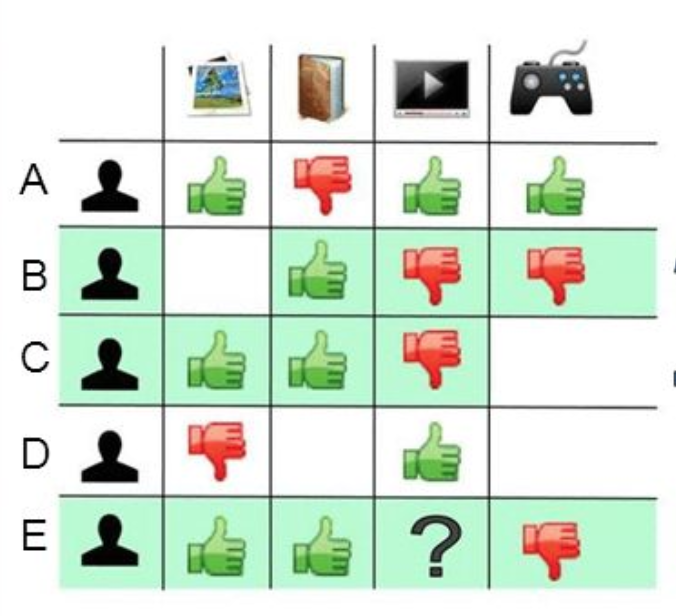

In [ ]:
# 1.- Importar librerías:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
# Creamos el dataset de transacciones (en este caso son likes o dislikes)
df = pd.DataFrame({"date": ["2023-01-01", "2023-01-02", "2023-01-03", "2023-01-04", "2023-01-05", "2023-01-06", "2023-01-07", "2023-01-08",
        "2023-01-09", "2023-01-10", "2023-01-11", "2023-01-12", "2023-01-13", "2023-01-14", "2023-01-15"],
                    "userId": ["A", "A", "B", "C", "C", "D", "E", "E", "A", "B", "C", "D", "A", "B", "E"],
                    "item": ["picture", "book", "book", "picture", "book", "picture", "picture", "book", "video", "video", "video",
        "video", "game", "game", "game"],
                    "like": [1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1]})
df

,date,userId,item,like
0,2023-01-01,A,picture,1
1,2023-01-02,A,book,-1
2,2023-01-03,B,book,1
3,2023-01-04,C,picture,1
4,2023-01-05,C,book,1
5,2023-01-06,D,picture,-1
6,2023-01-07,E,picture,1
7,2023-01-08,E,book,1
8,2023-01-09,A,video,1
9,2023-01-10,B,video,-1


In [37]:
# Convertir el dataset de transacciones en una matriz user-item
userItem = df.pivot("userId", "item")["like"]
userItem

item,book,game,picture,video
userId,,,,
A,-1.0,1.0,1.0,1.0
B,1.0,-1.0,NaN,-1.0
C,1.0,NaN,1.0,-1.0
D,NaN,NaN,-1.0,1.0
E,1.0,-1.0,1.0,NaN


In [38]:
# Comparar diferencias con un dataset hardcoded
df2 = pd.DataFrame({"userId": ["A", "B", "C", "D", "E"],
                    "picture": [1, 0, 1, -1, 1],
                    "book": [-1, 1, 1, 0, 1],
                    "video": [1, -1, -1, 1, 0],
                    "game": [1, -1, 0, 0, -1]})
df2

,userId,picture,book,video,game
0,A,1,-1,1,1
1,B,0,1,-1,-1
2,C,1,1,-1,0
3,D,-1,0,1,0
4,E,1,1,0,-1


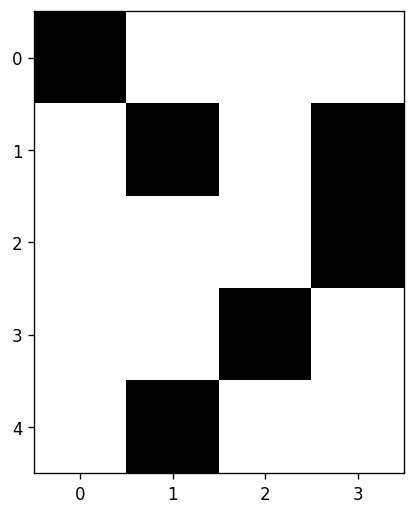

In [39]:
# Visualización de los valores de la matriz
plt.rcParams.update({'figure.figsize': (10, 5), 'figure.dpi': 120})
# Graficar matriz densa
plt.imshow(userItem, cmap='gray', interpolation='nearest')
plt.show()

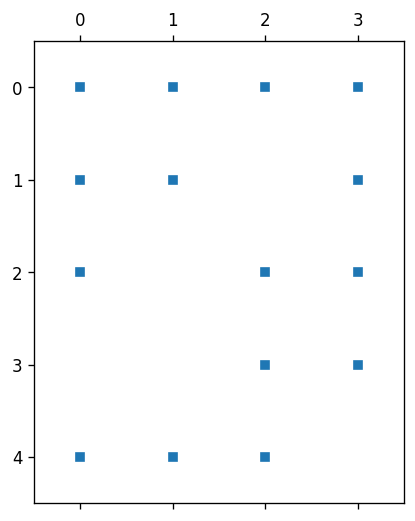

In [40]:
# Visualización de la densidad de la matriz
plt.spy(userItem, markersize=5)
plt.show()


***

In [ ]:
# User-based Collaborative Filtering w/ Sklearn module
# User to User Similarity Matrix
userUser = pd.DataFrame(cosine_similarity(userItem))
userUser


In [ ]:
# Reemplazamos NaNs con ceros (0)
userItemZero = userItem.fillna(0)
userItemZero

item,book,game,picture,video
userId,,,,
A,-1.0,1.0,1.0,1.0
B,1.0,-1.0,0.0,-1.0
C,1.0,0.0,1.0,-1.0
D,0.0,0.0,-1.0,1.0
E,1.0,-1.0,1.0,0.0


In [ ]:
# User to User Similarity Matrix
userUser = pd.DataFrame(cosine_similarity(userItemZero))
userUser

,0,1,2,3,4
0,1.000000,-0.866025,-0.288675,0.000000,-0.288675
1,-0.866025,1.000000,0.666667,-0.408248,0.666667
2,-0.288675,0.666667,1.000000,-0.816497,0.666667
3,0.000000,-0.408248,-0.816497,1.000000,-0.408248
4,-0.288675,0.666667,0.666667,-0.408248,1.000000


Vamos a hacer una recomendación para ek usuario E

¿Cuáles son los usuarios más parecidos al usuario E?

El usuario E es el usuario cuyo índice numérico es 4

Los usuarios 1 y 2 tienen una similitud de 0.6, son los que más se parecen al usuario 4

Por tanto, los usuario B y C son los que tienen un perfil de compra/likes más similar al usuario 4

In [ ]:
# Renombramos los títulos de columnas con los userId de la matriz userItem
userUser.columns = userItem.index
userUser

userId,A,B,C,D,E
0,1.000000,-0.866025,-0.288675,0.000000,-0.288675
1,-0.866025,1.000000,0.666667,-0.408248,0.666667
2,-0.288675,0.666667,1.000000,-0.816497,0.666667
3,0.000000,-0.408248,-0.816497,1.000000,-0.408248
4,-0.288675,0.666667,0.666667,-0.408248,1.000000


In [ ]:
# Creamos índice que también contenga los userId
# userUser["userId"] = userItem.index # primero creamos columna nueva
# userUser = userUser.set_index("userId") # después convertimos columna nueva en índice
userUser.index = userItem.index
userUser


userId,A,B,C,D,E
userId,,,,,
A,1.000000,-0.866025,-0.288675,0.000000,-0.288675
B,-0.866025,1.000000,0.666667,-0.408248,0.666667
C,-0.288675,0.666667,1.000000,-0.816497,0.666667
D,0.000000,-0.408248,-0.816497,1.000000,-0.408248
E,-0.288675,0.666667,0.666667,-0.408248,1.000000


***

## Generando recomendaciones

Queremos calcular una recomendación para el usuario E

In [42]:
userUser["E"]

userId
A   -0.288675
B    0.666667
C    0.666667
D   -0.408248
E    1.000000
Name: E, dtype: float64

Nos dice qué usuarios son más similares al usuario E. Vamos a ordenarlos de más similares a menos:

In [112]:
ranking = userUser["E"].sort_values(ascending = False)
ranking

userId
E    1.000000
B    0.666667
C    0.666667
A   -0.288675
D   -0.408248
Name: E, dtype: float64

In [113]:
type(ranking)

pandas.core.series.Series

In [137]:
similares = ranking[(ranking > 0) & (ranking < 1)]
similares

userId
B    0.666667
C    0.666667
Name: E, dtype: float64

In [148]:
list(similares.index)

['B', 'C']

Vemos que B y C son los usuarios más similares al que estamos recomendando. Obviamente E tiene similaridad 1 consigo mismo.

In [138]:
# Recordemos el aspecto de userItem
userItemZero

item,book,game,picture,video
userId,,,,
A,-1.0,1.0,1.0,1.0
B,1.0,-1.0,0.0,-1.0
C,1.0,0.0,1.0,-1.0
D,0.0,0.0,-1.0,1.0
E,1.0,-1.0,1.0,0.0


In [151]:
# Obtenemos las recomendaciones de los usuarios similares
userItemZero.loc[list(similares.index)]

item,book,game,picture,video
userId,,,,
B,1.0,-1.0,0.0,-1.0
C,1.0,0.0,1.0,-1.0


In [153]:
userItemZero.loc[list(similares.index)].sum()

item
book       2.0
game      -1.0
picture    1.0
video     -2.0
dtype: float64

Por tanto, éstas son las recomendaciones para el usuario E.

Podemos obtener la recomendación para el usuario E en el producto "video", que era el objetivo del ejercicio:

In [154]:
userItemZero.loc[list(similares.index)].sum()["video"]
# Resultado: -2.0 

-2.0

## Resultado: **NO se recomienda al usuario E el producto vídeo**